# Plot figure 1

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


## Data preparation

### Create dictionaries with json files and geojson folders

In [2]:
# get the directory with downloaded data
os.chdir("..")
home_dir = os.getcwd()
data_dir = os.path.join(home_dir, "downloaded-data")


In [3]:
# create dictionary with json files
json_names = []
for (dir_path, dir_names, file_names) in os.walk(data_dir):
    json_names.extend(file_names)
print(json_names)

json_names.sort()

pattern = re.compile(r"^blds.+")
json_dic = {k: v for (k,v) in zip(range(len(json_names)), json_names) if pattern.match(v)}
json_dic

['blds_africa_states_18-23_ai.json', 'blds_continent_data_18-23_ai.json', 'blds_northamerica_states_18-23_ai.json', 'roads_asia_states_18-23_ai.json', 'roads_continent_data_18-23_ai.json', 'roads_europe_states_18-23_ai.json']


{0: 'blds_africa_states_18-23_ai.json',
 1: 'blds_continent_data_18-23_ai.json',
 2: 'blds_northamerica_states_18-23_ai.json'}

In [4]:
# create list of folders with geojson files
geojson_folder_lst = []
for (dir_path, dir_names, file_names) in os.walk(home_dir):  # give the path
    for dir_name in dir_names:
        # print(dir_name)
        pattern = re.compile(r"^geojson.+states$")
        
        if pattern.match(dir_name):
            # print(dir_name)
            geojson_folder_lst.append(dir_name)
geojson_folder_lst


['geojson-africa-states',
 'geojson-asia-states',
 'geojson-continent-states',
 'geojson-europe-states',
 'geojson-northamerica-states']

In [5]:
# create location list from json files
location_lst = []
for _json in json_dic.values():
    match = re.search(r"(?<=_)[^_]+(?=_)",
                      _json)
    if match:
        substring = match.group(0)
        print(substring)
        location_lst.append(substring)
location_lst

africa
continent
northamerica


['africa', 'continent', 'northamerica']

In [6]:
# create a a list with the selection of geojson folders
sel_geojson_folder_lst = []
for location in location_lst:
    # print(location)
    for folder in geojson_folder_lst:
        # print(folder)
        if location in folder:
            sel_geojson_folder_lst.append(folder)
sel_geojson_folder_lst.sort()


In [7]:
sel_geojson_folder_lst


['geojson-africa-states',
 'geojson-continent-states',
 'geojson-northamerica-states']

In [8]:
# create final geojson_folder_dic according to the json_dic
geojson_folder_dic = {k: v for (k, v) in zip(json_dic.keys(), sel_geojson_folder_lst)}
geojson_folder_dic


{0: 'geojson-africa-states',
 1: 'geojson-continent-states',
 2: 'geojson-northamerica-states'}

### Definitions

In [9]:
# user input definition

while True:
    user_d_spec = input(f"Which data do you want to plot?\
                            Enter the number of the json file:\n\
                            {json_dic}"
                        )
    try:
        user_d_spec = int(user_d_spec)
    except ValueError:
        print(f"You wrote: {user_d_spec}, please enter a number.")
        continue
    if user_d_spec not in json_dic.keys():
        print(
            f"You wrote: {user_d_spec}, please enter one of these numbers: {json_dic.keys()}.")
        continue
    break


In [10]:
# function definitions

def data_spec(data_dic):
    
    try:
        with open(f"downloaded-data\\{data_dic[user_d_spec]}", "r") as f:
            data = json.load(f)
        return data
    except Exception as e:
        print(e)
        print("Please download the data first.")


def get_geojson_names(home_dir, geojson_folder_dic):
    geojson_dir = os.path.join(home_dir, geojson_folder_dic[user_d_spec], "")

    geojson_names = []
    for (dir_path, dir_names, file_names) in os.walk(geojson_dir):  # give the path
        geojson_names.extend(file_names)
    print(geojson_names)
    return geojson_names


### Load the data

In [11]:
data = data_spec(json_dic)

### Edit the obtained data into desired shape to create a DataFrame

In [12]:
d = {
    "feature": [],
    "source": [],
    "timestamp": [],
    "value": []
}


In [13]:
for cont in data:
    for dic1 in cont:
        feature, source = dic1["groupByObject"][0], dic1["groupByObject"][1]
        for res in dic1["result"]:
            d["feature"].append(feature)
            d["source"].append(source)
            d["timestamp"].append(res["timestamp"])
            d["value"].append(res["value"])

df = pd.DataFrame(d)
# df

In [14]:
# extract only the year
df["year"] = pd.to_datetime(df["timestamp"]).dt.year

### Append the names of the regions to the DataFrame

In [15]:
# extract the geojson IDs and the names
geojson_names = get_geojson_names(home_dir, geojson_folder_dic)


['0_Costa Rica.geojson', '10_Mexico.geojson', '11_Belize.geojson', '12_Panama.geojson', '13_Bahamas.geojson', '14_Trinidad and Tobago.geojson', '15_Grenada.geojson', '16_St. Vin. and Gren..geojson', '17_Barbados.geojson', '18_Saint Lucia.geojson', '19_Dominica.geojson', '1_Nicaragua.geojson', '20_Antigua and Barb..geojson', '21_St. Kitts and Nevis.geojson', '22_Jamaica.geojson', '23_Bajo Nuevo Bank.geojson', '24_Serranilla Bank.geojson', '2_Haiti.geojson', '3_Dominican Rep..geojson', '4_El Salvador.geojson', '5_Guatemala.geojson', '6_Cuba.geojson', '7_Honduras.geojson', '8_United States of America.geojson', '9_Canada.geojson']


In [16]:
geojson_names_2 = geojson_names

id_name_dic = {int(re.search(r'^\d+', k)[0]): re.search(r'\_.+\.', v)[0][1:-1] # using lib RegularExpression to separate the ID number and the state name
                for k, v in zip(geojson_names, geojson_names_2)}
id_name_ser = pd.Series(id_name_dic)
id_name_df = pd.DataFrame(id_name_ser, columns=["name"])
id_name_df = id_name_df.reset_index().rename(columns={"index": "id"})
id_name_df["id"] = id_name_df["id"].astype(int)
# id_name_df


In [17]:
# merge df with region names based on IDs
df = df.merge(id_name_df, how="left", left_on="feature",
               right_on="id")
# df.head(20)

### Filtering the data

In [ ]:
# exclude states which give zero in total
df = df.groupby("name", "source").filter(
    lambda x: x["value"].sum() != 0)


In [18]:
# get the number of AI Microsoft (source=microsoft/BuildingFootprints) / manually mapped (remainder) buildings for every year
grouped = df.groupby(["name", "year"])["value"].sum()
# grouped

In [19]:
grouped


source                               year
remainder                            2018    28496571.0
                                     2019    33936935.0
                                     2020    41374001.0
                                     2021    49255789.0
                                     2022    56548562.0
                                     2023    65794687.0
source=microsoft/BuildingFootprints  2018           0.0
                                     2019           0.0
                                     2020       13935.0
                                     2021     2310941.0
                                     2022     5369336.0
                                     2023     8556752.0
Name: value, dtype: float64

In [20]:
# merge the DataFrame with groupBy DataFrame and compute the percentage
merged_data = df.merge(grouped, on=["name", 'year'], how='left', )
merged_data = merged_data.rename(columns={"value_x":"num_of_blds", "value_y":"total_blds"})
merged_data["percentage"] = (merged_data["num_of_blds"] / merged_data["total_blds"]) * 100
# merged_data.head(10)


In [21]:
# percentage verification
merged_data.groupby(["name", "year"])["percentage"].sum()


source                               year
remainder                            2018    100.0
                                     2019    100.0
                                     2020    100.0
                                     2021    100.0
                                     2022    100.0
                                     2023    100.0
source=microsoft/BuildingFootprints  2018      0.0
                                     2019      0.0
                                     2020    100.0
                                     2021    100.0
                                     2022    100.0
                                     2023    100.0
Name: percentage, dtype: float64

In [22]:
# create the dataframe by the source
df_ai = merged_data.loc[(df["source"] == "source=microsoft/BuildingFootprints") , :] # buiildings used from Microsoft AI
df_rem = merged_data.loc[(df["source"] == "remainder"),:] # remainder = manually mapped buildings
# df_ai.head()


In [23]:
# exclude states which give zero in total
df_rem = df_rem.groupby("name").filter(
    lambda x: x["num_of_blds"].sum() != 0)
df_ai = df_ai.groupby("name").filter(
    lambda x: x["num_of_blds"].sum() != 0)


In [24]:
# verify the sum
# df_rem.groupby("name")["num_of_blds"].sum().sort_values(ascending=True)


In [25]:
# verify the sum
# df_ai.groupby("name")["num_of_blds"].sum().sort_values(ascending=True)


In [26]:
# how the DataFrame looks like – manually mapped buildings
df_rem.head()


,feature,source,timestamp,num_of_blds,year,id,name,total_blds,percentage
0,0,remainder,2018-01-01T00:00:00Z,61906.0,2018,0,Costa Rica,28496571.0,0.217240
1,0,remainder,2019-01-01T00:00:00Z,76289.0,2019,0,Costa Rica,33936935.0,0.224796
2,0,remainder,2020-01-01T00:00:00Z,86564.0,2020,0,Costa Rica,41374001.0,0.209223
3,0,remainder,2021-01-01T00:00:00Z,106221.0,2021,0,Costa Rica,49255789.0,0.215652
4,0,remainder,2022-01-01T00:00:00Z,134409.0,2022,0,Costa Rica,56548562.0,0.237688


In [27]:
# how the DataFrames look like – AI Microsoft buildings
df_ai.head()

,feature,source,timestamp,num_of_blds,year,id,name,total_blds,percentage
6,0,source=microsoft/BuildingFootprints,2018-01-01T00:00:00Z,0.0,2018,0,Costa Rica,0.0,NaN
7,0,source=microsoft/BuildingFootprints,2019-01-01T00:00:00Z,0.0,2019,0,Costa Rica,0.0,NaN
8,0,source=microsoft/BuildingFootprints,2020-01-01T00:00:00Z,0.0,2020,0,Costa Rica,13935.0,0.0
9,0,source=microsoft/BuildingFootprints,2021-01-01T00:00:00Z,0.0,2021,0,Costa Rica,2310941.0,0.0
10,0,source=microsoft/BuildingFootprints,2022-01-01T00:00:00Z,0.0,2022,0,Costa Rica,5369336.0,0.0


## Plots

In [28]:
def fill_under_lines(*argv, alpha=.2, **kwargs):
    for ax in argv:
        if ax is None:
            ax = plt.gca()
        for line in ax.lines:
            x, y = line.get_xydata().T
            ax.fill_between(x, 0, y, color=line.get_color(), alpha=alpha, **kwargs)

In [29]:
# prepare DataFrame of labels to the end of lines

df_last_rem = df_rem.groupby("name")[["num_of_blds", "year"]].last().reset_index()
df_last_ai = df_ai.groupby("name")[["num_of_blds", "year"]].last().reset_index()
# df_last_rem

### Manually mapped buildings

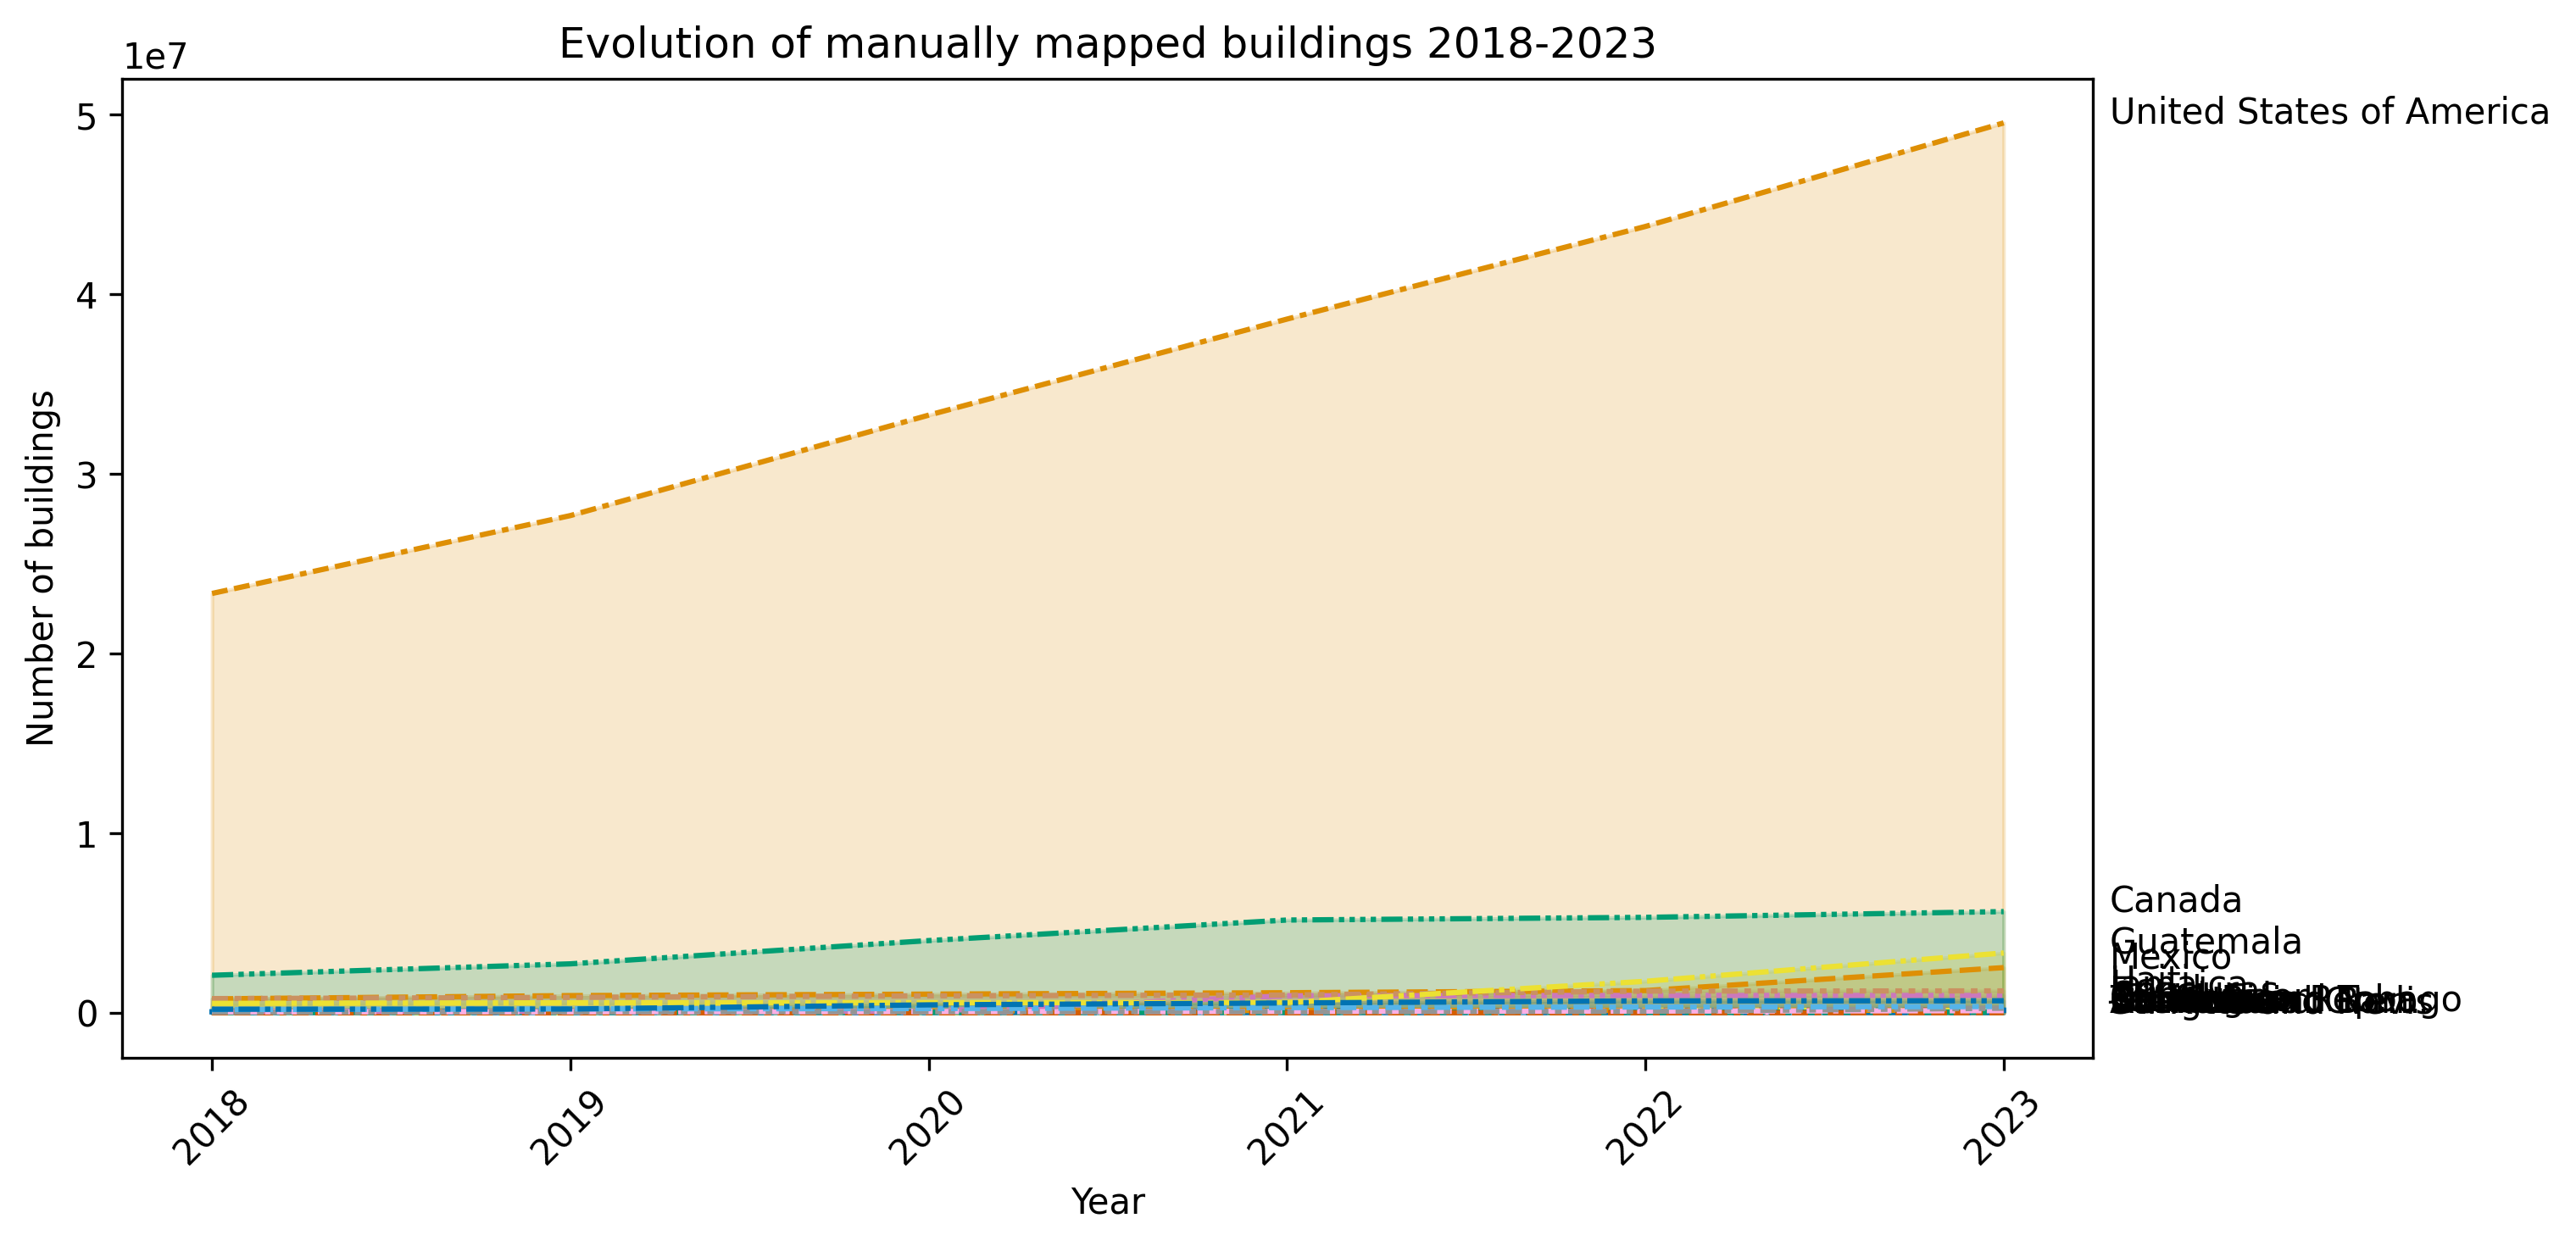

In [30]:
# test for labels at the line

plt.figure(figsize=(10, 5), dpi=300)
plt.title("Evolution of manually mapped buildings 2018-2023")

# plot the data
ax = sns.lineplot(x='year', y='num_of_blds', hue='name', data=df_rem,
                  palette='colorblind',  style='name', legend=False
                  )
# log y axis
# plt.yscale("log")

# rotate x labels
plt.xticks(rotation=45)
# plt.ylim(top=105)

# fill the area under lines
fill_under_lines(ax)

# add number annotations
# for index, row in df_rem.iterrows():
#     ax.annotate(round(row['num_of_blds']),
#                 (row['year'], row['num_of_blds']))

# add annotations in the end of the lines
for i in range(len(df_last_rem)):
    ax.annotate(df_last_rem.iloc[i]['name'], xy=(df_last_rem.iloc[i]["year"], df_last_rem.iloc[i]
                ['num_of_blds']), xytext=(30, 0), textcoords='offset points', color='black',)

# add colorful annotation
# for line, name in zip(ax.lines, df_last_rem["name"]):
#     y = line.get_ydata()[-1]
#     ax.annotate(name, xy=(1, y), xytext=(1, 0), color=line.get_color(),
#                 xycoords=ax.get_yaxis_transform(), textcoords="offset points",
#                 size=14, va="center")


# set x and y axis labels
plt.xlabel("Year")
plt.ylabel("Number of buildings")

plt.show()


Text(0, 0.5, 'Number of buildings')

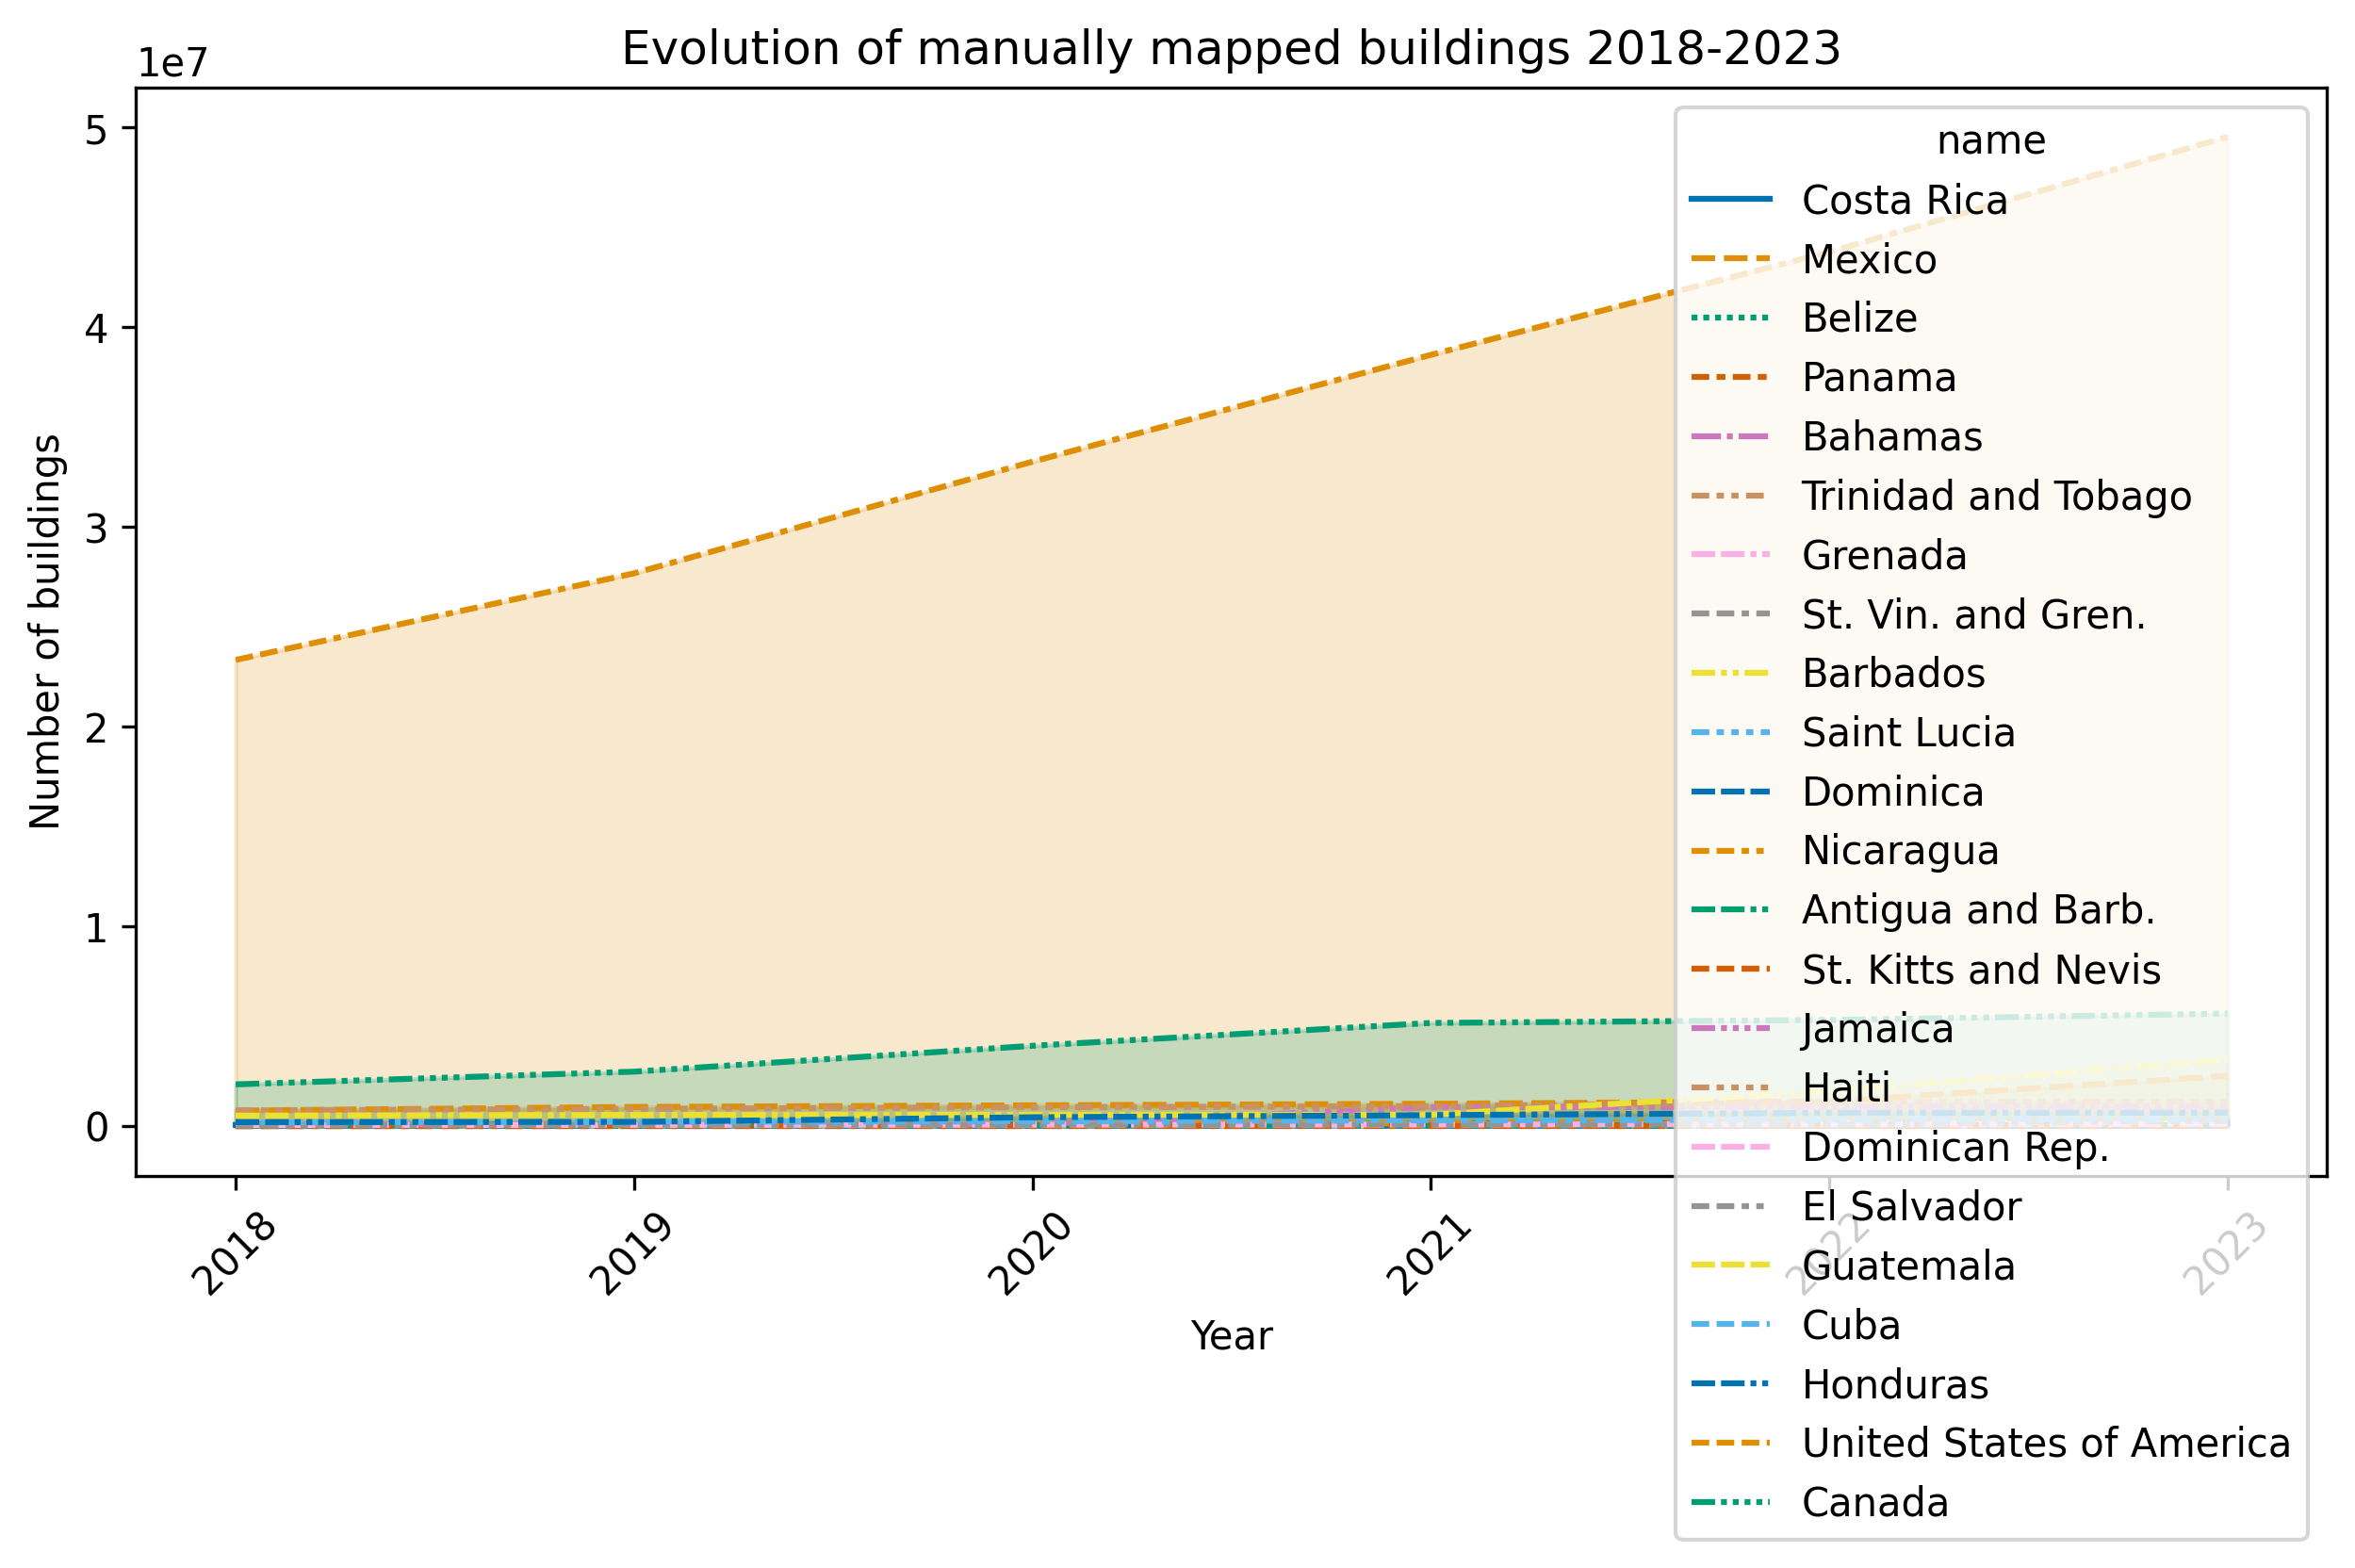

In [31]:
# without dictionary labels

plt.figure(figsize=(10, 5), dpi=300)
plt.title("Evolution of manually mapped buildings 2018-2023")

# plot the data
ax = sns.lineplot(x='year', y='num_of_blds', hue='name', data=df_rem,
                  palette='colorblind',  style='name',
                  )
# log y axis
# plt.yscale("log")

# rotate x labels
plt.xticks(rotation=45)
# plt.ylim(top=105)

# fill the area under lines
fill_under_lines(ax)

# set x and y axis labels
plt.xlabel("Year")
plt.ylabel("Number of buildings")


### AI Microsoft buildings

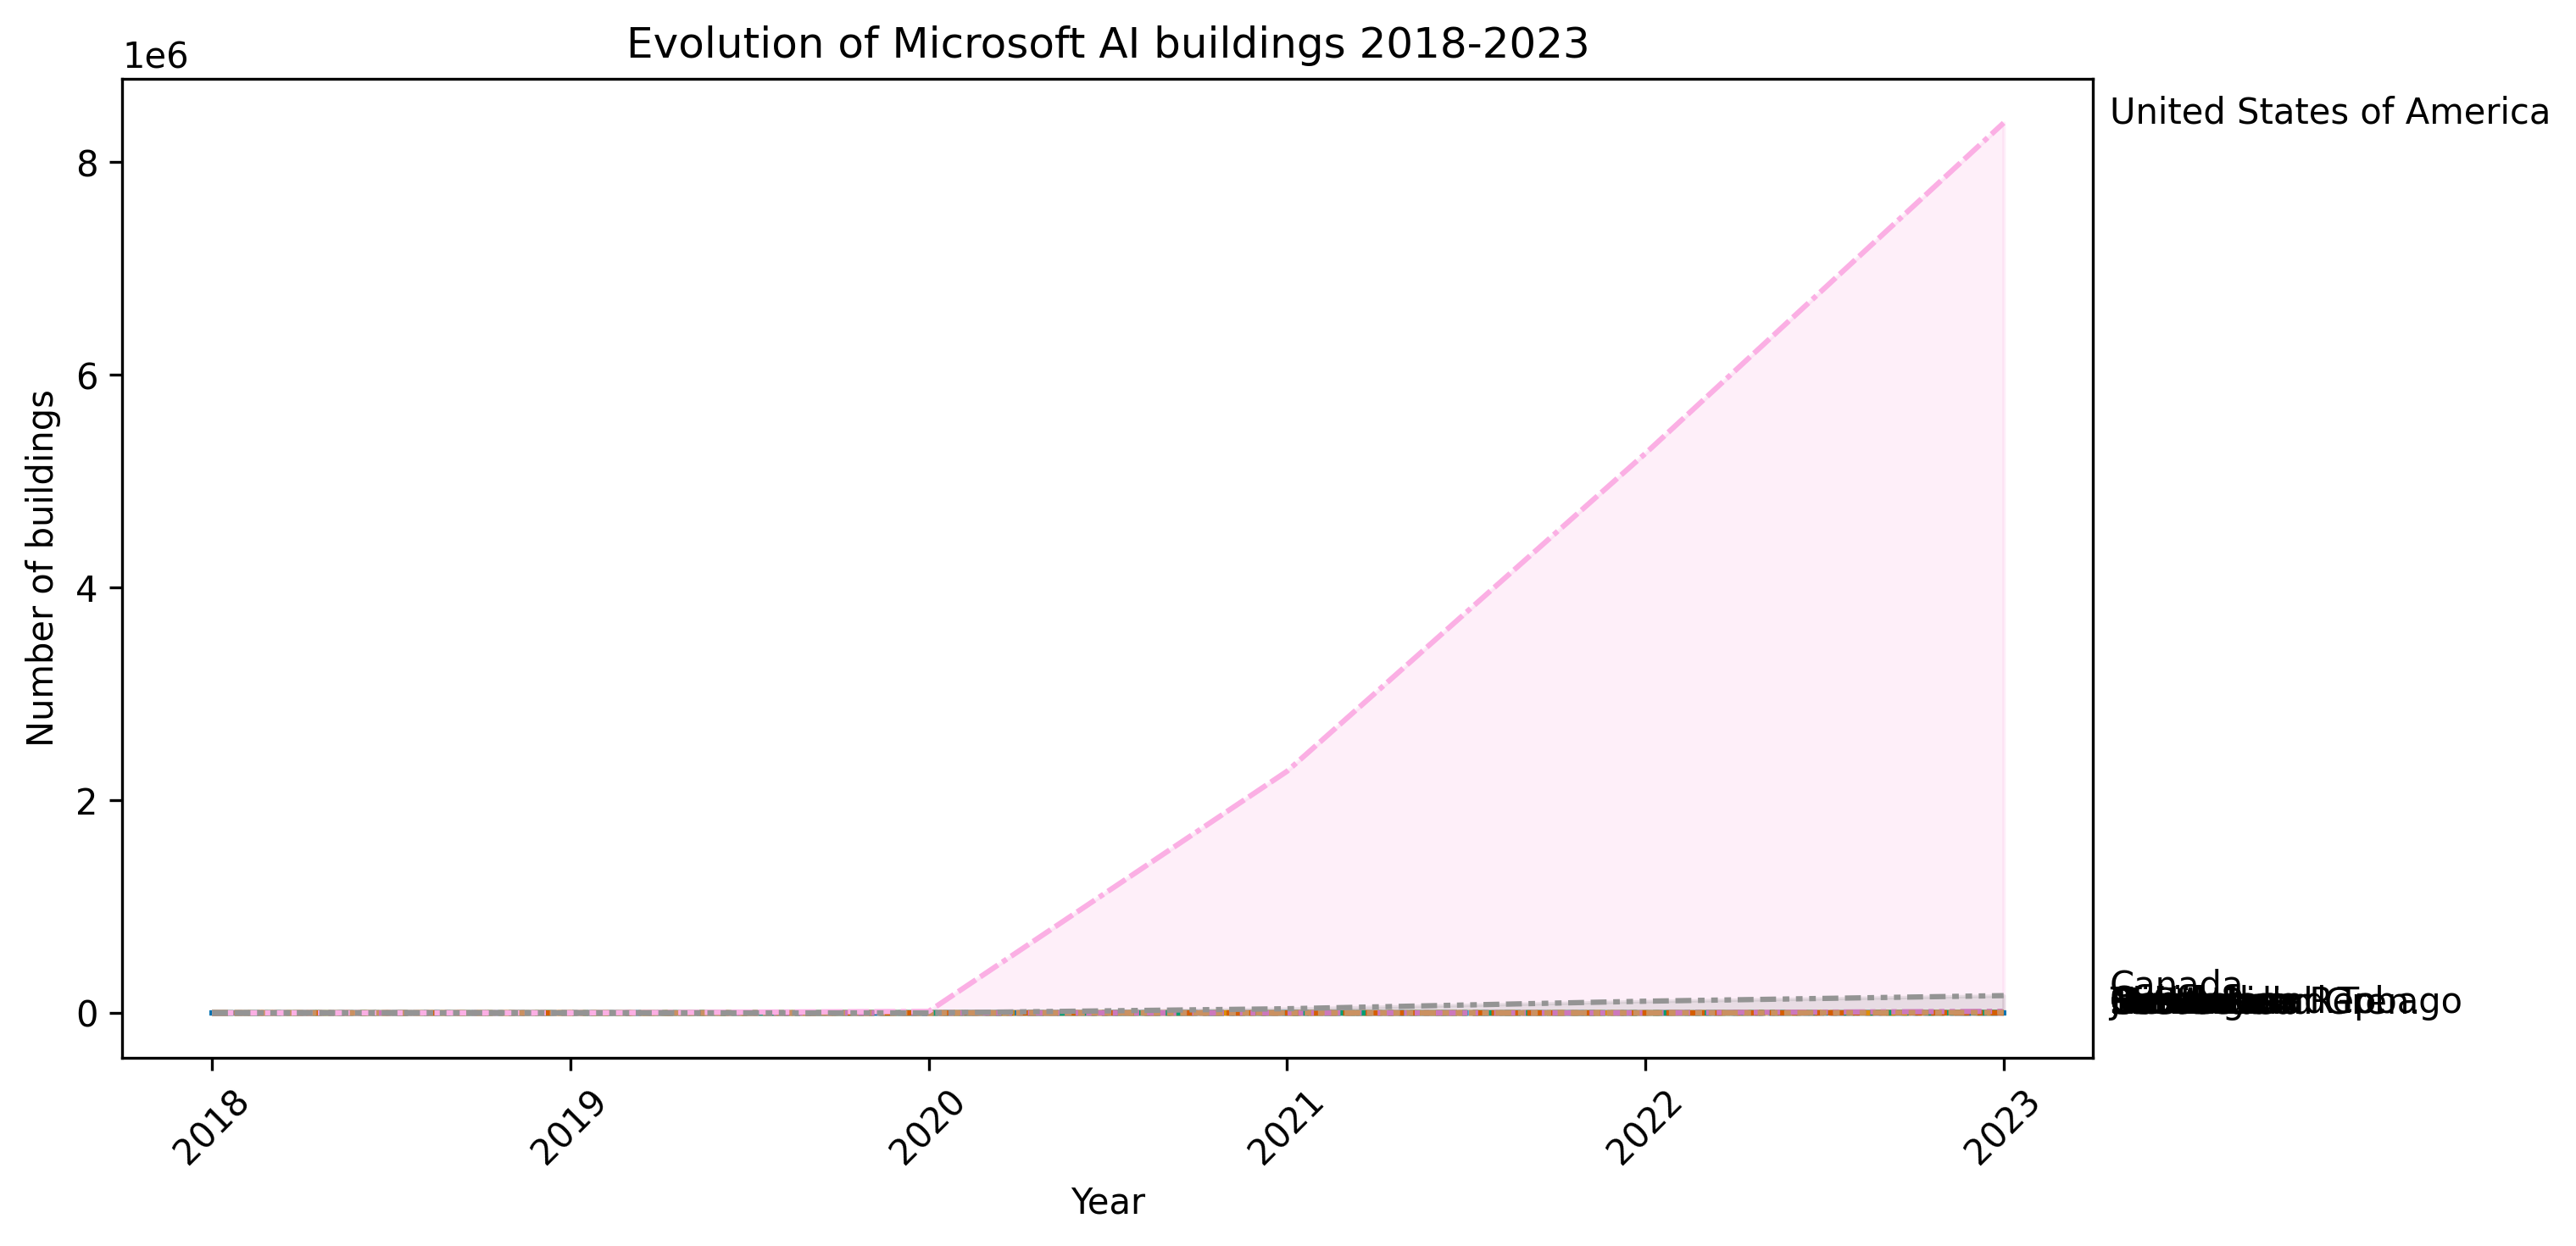

In [32]:
# test for labels at the line

plt.figure(figsize=(10, 5), dpi=300)
plt.title("Evolution of Microsoft AI buildings 2018-2023")

# plot the data
ax = sns.lineplot(x='year', y='num_of_blds', hue='name', data=df_ai,
                  palette='colorblind',  style='name', legend=False
                  )
# log y axis
# plt.yscale("log")

# rotate x labels
plt.xticks(rotation=45)
# plt.ylim(top=105)

# fill the area under lines
fill_under_lines(ax)

# add annotations in the end of the lines
for i in range(len(df_last_ai)):
    ax.annotate(df_last_ai.iloc[i]['name'], xy=(df_last_ai.iloc[i]["year"], df_last_ai.iloc[i]
                ['num_of_blds']), xytext=(30, 0), textcoords='offset points')


# add colorful annotation
# for line, name in zip(ax.lines, df_last_ai["name"]):
#     y = line.get_ydata()[-1]
#     ax.annotate(name, xy=(1, y), xytext=(1, 0), color=line.get_color(),
#                 xycoords=ax.get_yaxis_transform(), textcoords="offset points",
#                 size=14, va="center")


# set x and y axis labels
plt.xlabel("Year")
plt.ylabel("Number of buildings")

plt.show()


Text(0, 0.5, 'Number of buildings')

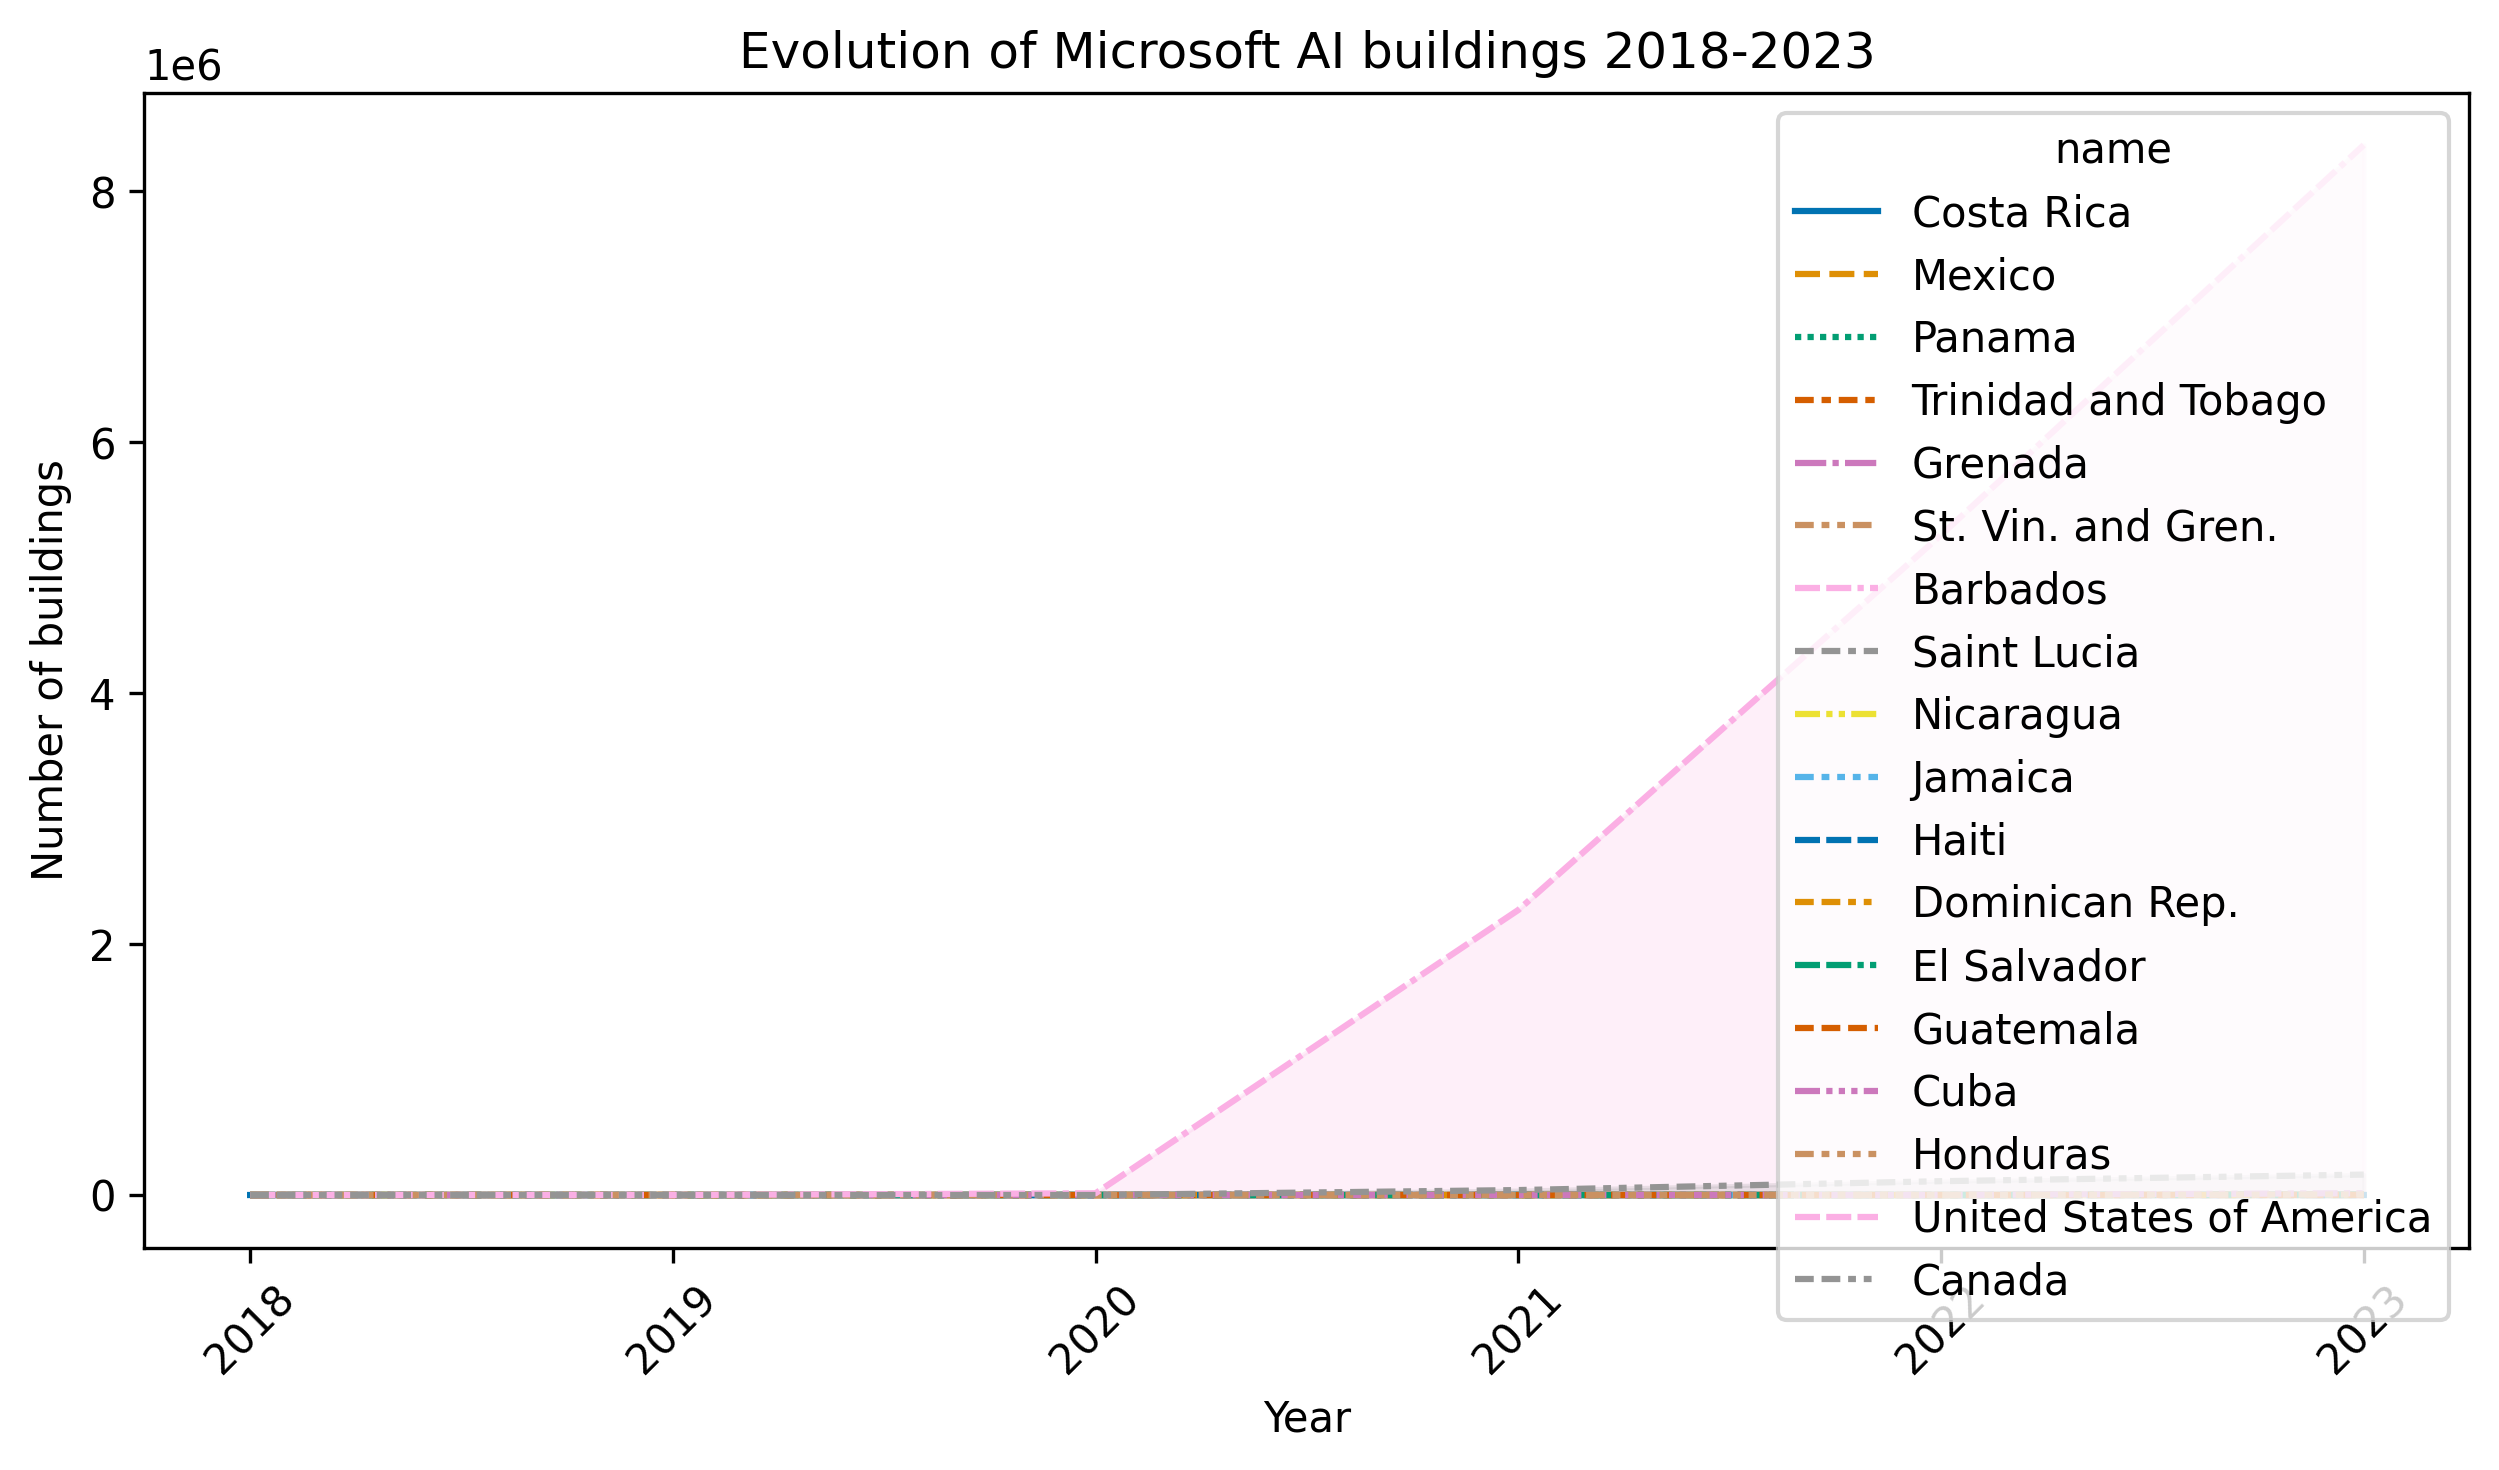

In [33]:
# without dictionary labels

plt.figure(figsize=(10, 5), dpi=300)
plt.title("Evolution of Microsoft AI buildings 2018-2023")

# plot the data
ax = sns.lineplot(x='year', y='num_of_blds', hue='name', data=df_ai,
                  palette='colorblind',  style='name',
                  )
# log y axis
# plt.yscale("log")

# rotate x labels
plt.xticks(rotation=45)
# plt.ylim(top=105)

# fill the area under lines
fill_under_lines(ax)

# set x and y axis labels
plt.xlabel("Year")
plt.ylabel("Number of buildings")


### AI Microsoft and Manually mapped buildings together

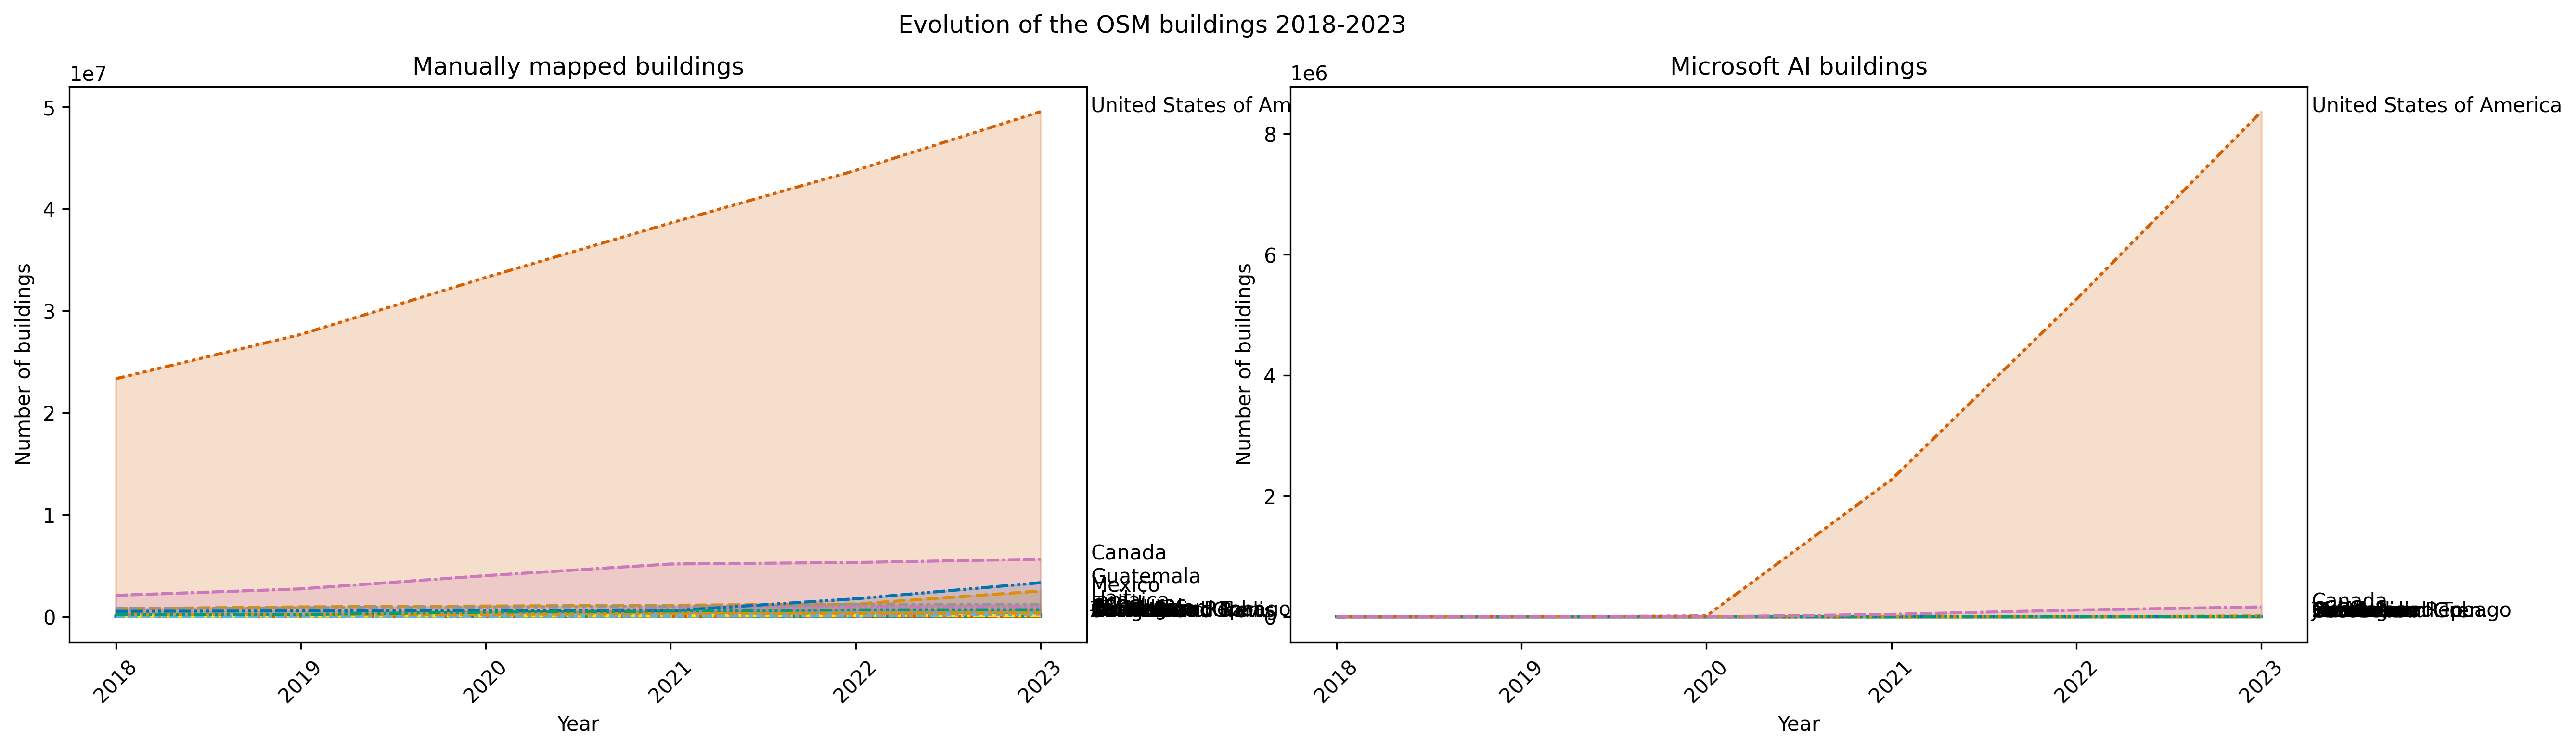

In [34]:
# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5), dpi=300)
fig.suptitle("Evolution of the OSM buildings 2018-2023")

fig.subplots_adjust(hspace=2)

# create a Seaborn plot on the first subplot
sns.lineplot(x='year', y='num_of_blds', hue='feature', data=df_rem, ax=ax1,
             palette='colorblind', style='feature',
             hue_order=id_name_dic.keys(),
             style_order=id_name_dic.keys(),
             legend=False
             )

# create another Seaborn plot on the second subplot
sns.lineplot(x='year', y='num_of_blds', hue='feature', data=df_ai, ax=ax2,
             palette='colorblind', style='feature',
             hue_order=id_name_dic.keys(),
             style_order=id_name_dic.keys(),
             legend=False
             )


# ax1.set_yscale("log")
# ax2.set_yscale("log")

# set titles for each subplot
ax1.set_title("Manually mapped buildings")
ax2.set_title("Microsoft AI buildings")

# set the y axis limit
# ax1.set_ylim(top=105, bottom=-5)
# ax2.set_ylim(top=105, bottom=-5)

# set the y axis label
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of buildings")

# set the x axis label
ax2.set_xlabel("Year")
ax2.set_ylabel("Number of buildings")

# fill the area under lines
fill_under_lines(ax1, ax2)

# rotate x-axis labels for both subplots
for ax in [ax1, ax2]:
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.tick_params(axis='x', labelrotation=45)

# add colorful annotation
# for line, name in zip(ax1.lines, df_last_rem["name"]):
#     y = line.get_ydata()[-1]
#     ax1.annotate(name, xy=(1, y), xytext=(1, 0), color=line.get_color(),
#                  xycoords=ax1.get_yaxis_transform(), textcoords="offset points",
#                  size=14, va="center")

# for line, name in zip(ax2.lines, df_last_ai["name"]):
#     y = line.get_ydata()[-1]
#     ax2.annotate(name, xy=(1, y), xytext=(1, 0), color=line.get_color(),
#                  xycoords=ax2.get_yaxis_transform(), textcoords="offset points",
#                  size=14, va="center")



# add annotations in the end of the lines – ax1
for i in range(len(df_last_rem)):
    ax1.annotate(df_last_rem.iloc[i]['name'], xy=(df_last_rem.iloc[i]["year"], df_last_rem.iloc[i]
                ['num_of_blds']), xytext=(25, 0), textcoords='offset points')

# add annotations in the end of the lines – ax2
for i in range(len(df_last_ai)):
    ax2.annotate(df_last_ai.iloc[i]['name'], xy=(df_last_ai.iloc[i]["year"], df_last_ai.iloc[i]
    ['num_of_blds']), xytext=(25, 0), textcoords='offset points')

plt.show()


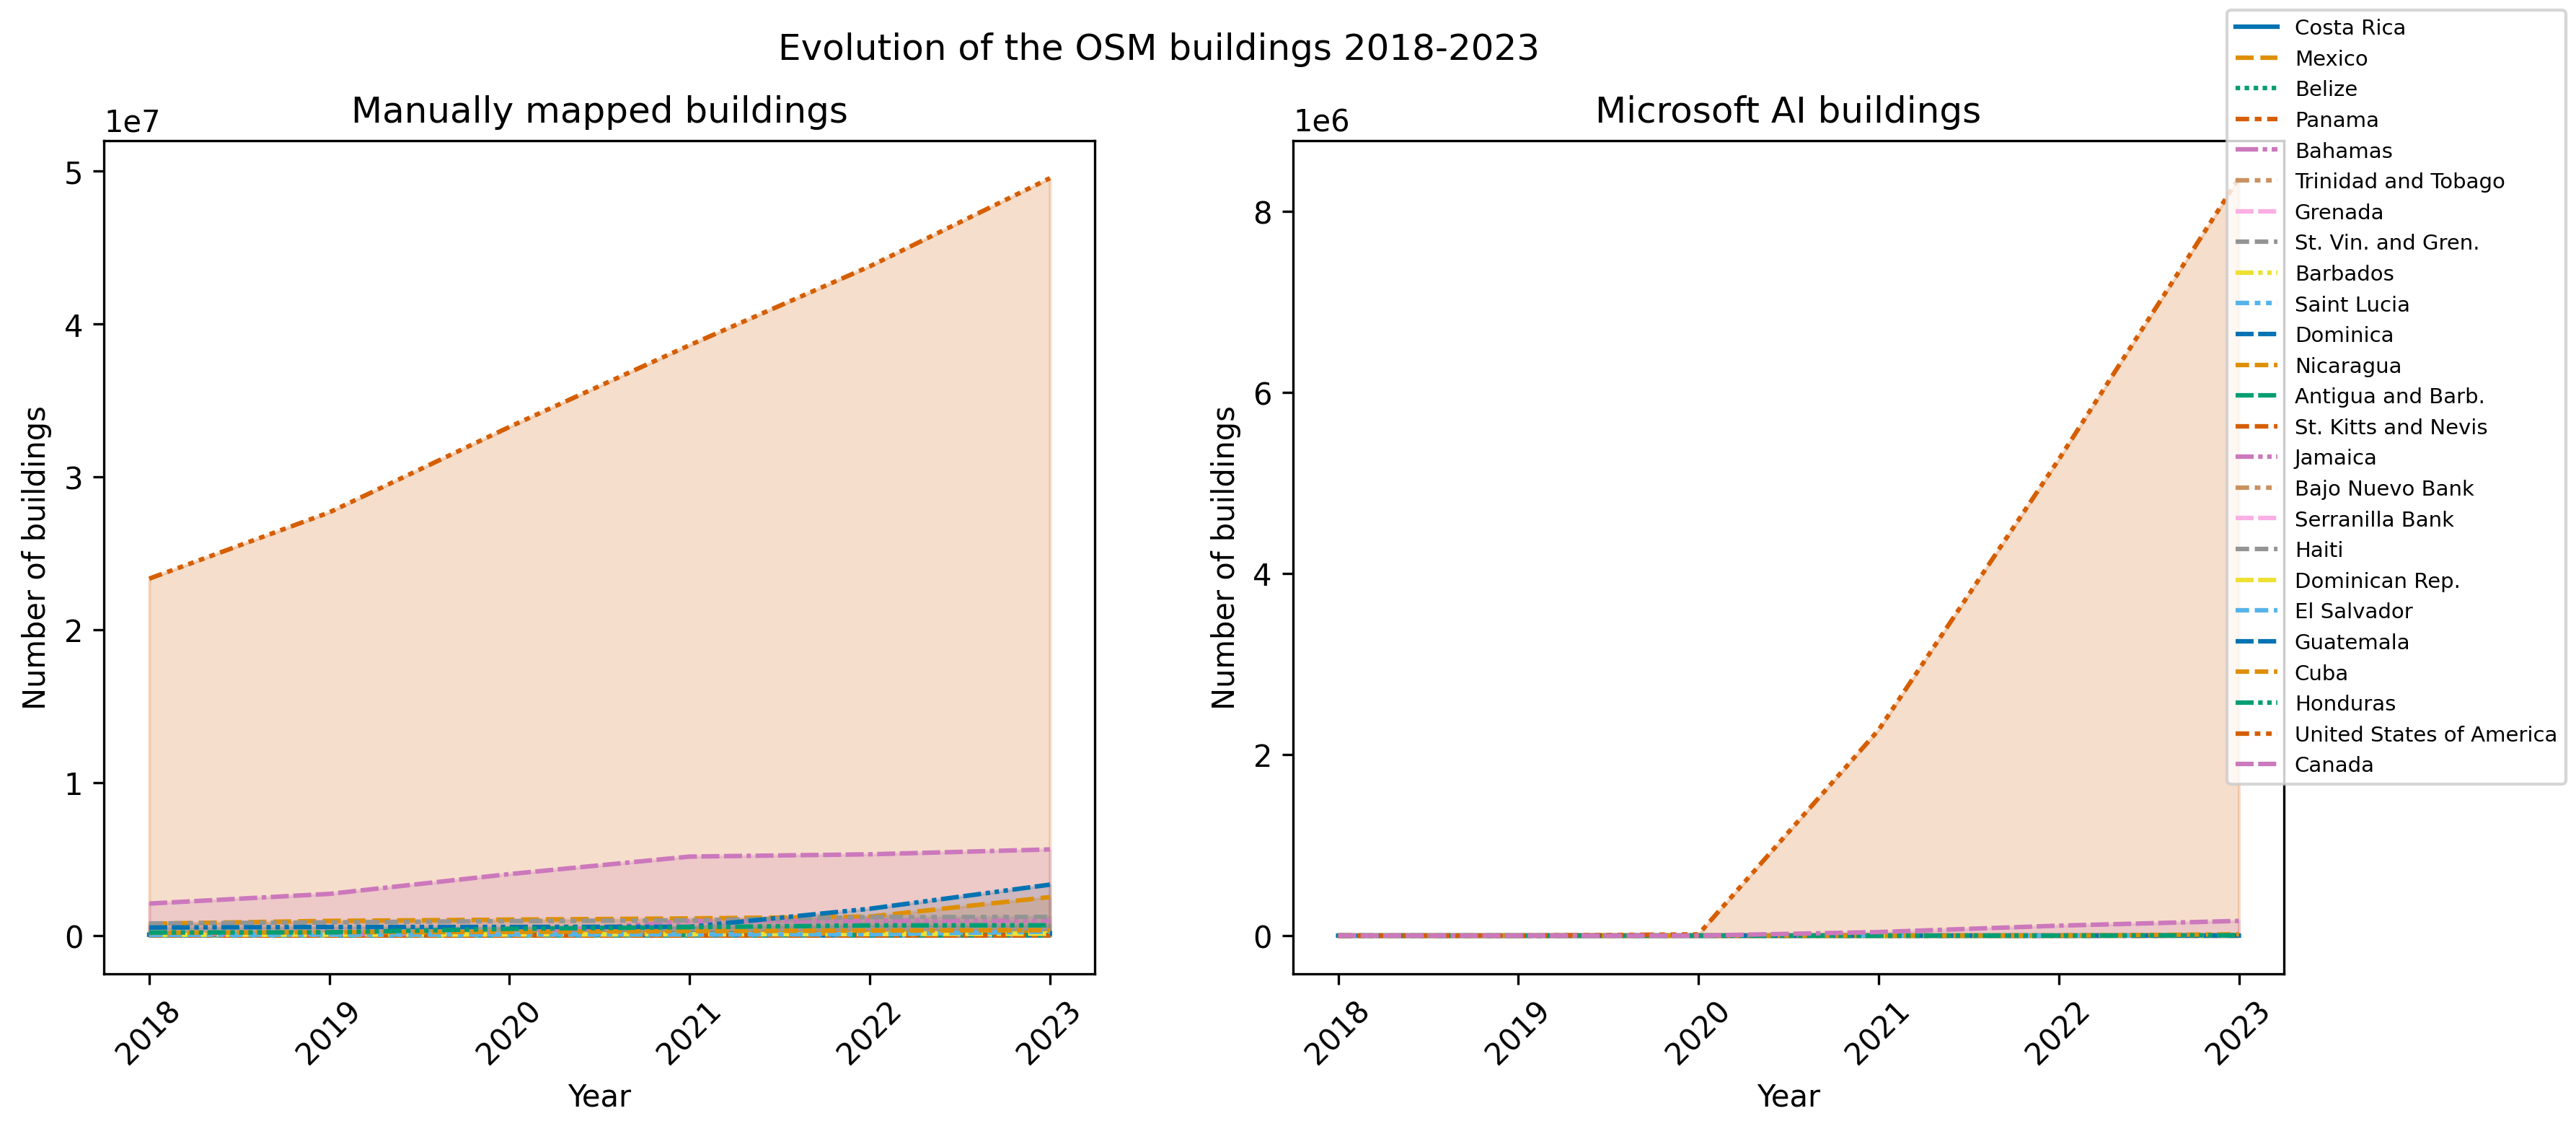

In [35]:
# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 5), dpi=300)
fig.suptitle("Evolution of the OSM buildings 2018-2023")

# create a Seaborn plot on the first subplot
sns.lineplot(x='year', y='num_of_blds', hue='feature', data=df_rem, ax=ax1,
             palette='colorblind', style='feature',
             hue_order=id_name_dic.keys(),
             style_order=id_name_dic.keys()
             )

# create another Seaborn plot on the second subplot
sns.lineplot(x='year', y='num_of_blds', hue='feature', data=df_ai, ax=ax2,
             palette='colorblind', style='feature',
             hue_order=id_name_dic.keys(),
             style_order=id_name_dic.keys())

# set the legend labels
handles, _ = plt.gca().get_legend_handles_labels()
ax2.legend(handles, [id_name_dic[key]
           for key in id_name_dic.keys()], fontsize=7)
ax1.legend().remove()
ax2.legend().remove()

# ax1.set_yscale("log")
# ax2.set_yscale("log")

# set titles for each subplot
ax1.set_title("Manually mapped buildings")
ax2.set_title("Microsoft AI buildings")

# set the y axis limit
# ax1.set_ylim(top=105, bottom=-5)
# ax2.set_ylim(top=105, bottom=-5)

# set the y axis label
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of buildings")

# set the x axis label
ax2.set_xlabel("Year")
ax2.set_ylabel("Number of buildings")

# fill the area under lines
fill_under_lines(ax1, ax2)

# rotate x-axis labels for both subplots
for ax in [ax1, ax2]:
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.tick_params(axis='x', labelrotation=45)

fig.legend(handles, [id_name_dic[key]
           for key in id_name_dic.keys()], fontsize=7)

plt.show()
